In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [30]:
df = pd.read_csv("bank_statements.csv")
df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.8,2023-06-27T09:40:19+05:30,2023-06-27,6e80ee9f-49b5-434f-8ab6-f192a2296e6c,GAS FILLING STATION,NaN
1,DEBIT,CARD,170.0,2010.8,2023-06-28T09:51:57+05:30,2023-06-28,a734aa85-4bf8-44c0-b508-305f554dc51e,GAS FILLING STATION,NaN
2,DEBIT,CARD,500.0,1510.8,2023-07-26T10:04:00+05:30,2023-07-26,dc44e071-399f-4ec2-b6ec-64f9e8a05a8a,GAS FILLING STATION,NaN
3,CREDIT,OTHERS,15.0,1525.8,2023-08-06T11:10:38+05:30,2023-07-31,0adc1ed0-4809-462d-855c-84cda5593c80,5188810,NaN
4,DEBIT,ATM,1000.0,525.8,2023-08-07T17:13:13+05:30,2023-08-07,1a018d91-db8a-416d-b49f-d03a84bc5c7b,ATM,NaN


In [37]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   type                  985 non-null    object                   
 1   mode                  985 non-null    object                   
 2   amount                985 non-null    float64                  
 3   currentBalance        985 non-null    float64                  
 4   transactionTimestamp  985 non-null    datetime64[ns, UTC+05:30]
 5   valueDate             985 non-null    object                   
 6   narration             985 non-null    object                   
dtypes: datetime64[ns, UTC+05:30](1), float64(2), object(4)
memory usage: 54.0+ KB


type                    0
mode                    0
amount                  0
currentBalance          0
transactionTimestamp    0
valueDate               0
narration               0
dtype: int64

In [38]:
df = df.drop(columns=['txnId', 'reference'], errors='ignore')

df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df['valueDate'] = pd.to_datetime(df['valueDate'], errors='ignore')

df['narration'] = df['narration'].fillna('UNKNOWN')


C:\Users\Admin\AppData\Local\Temp\ipykernel_11480\1744280786.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['valueDate'] = pd.to_datetime(df['valueDate'], errors='ignore')


In [39]:
atm_df = df[df['mode'] == 'ATM'].copy()
atm_df.shape


(3, 7)

In [40]:
atm_df['hour'] = atm_df['transactionTimestamp'].dt.hour
atm_df['day'] = atm_df['transactionTimestamp'].dt.day
atm_df['month'] = atm_df['transactionTimestamp'].dt.month


In [41]:
atm_df['needs_refill'] = (atm_df['currentBalance'] < 10000).astype(int)

atm_df['needs_refill'].value_counts()


needs_refill
1    3
Name: count, dtype: int64

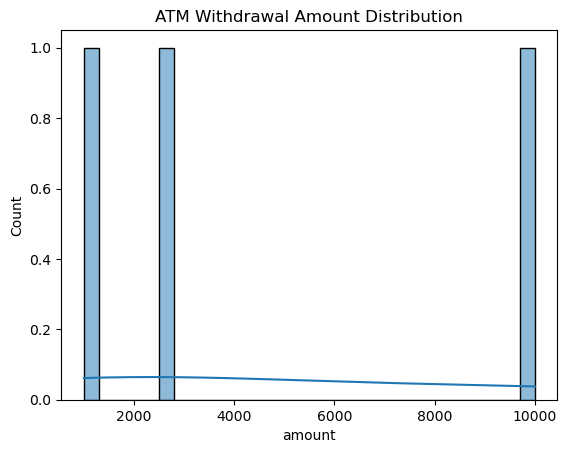

In [44]:
sns.histplot(atm_df['amount'], bins=30, kde=True)
plt.title("ATM Withdrawal Amount Distribution")
plt.show()


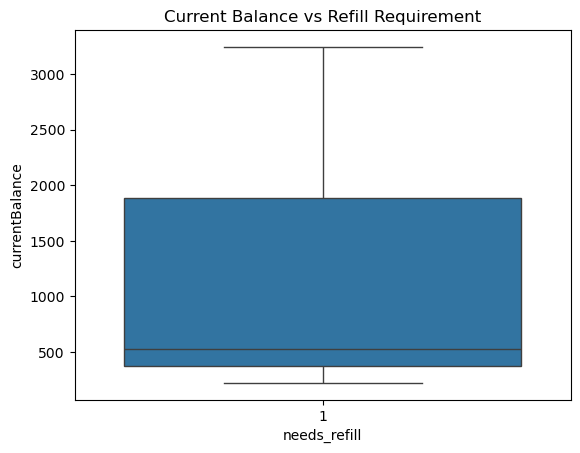

In [45]:
sns.boxplot(x='needs_refill', y='currentBalance', data=atm_df)
plt.title("Current Balance vs Refill Requirement")
plt.show()


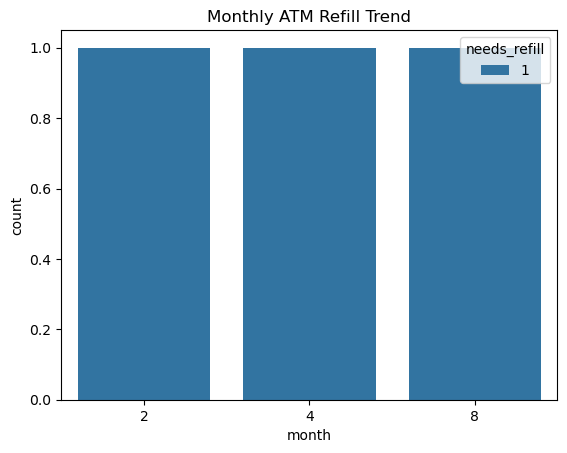

In [47]:
sns.countplot(x='month', hue='needs_refill', data=atm_df)
plt.title("Monthly ATM Refill Trend")
plt.show()


In [48]:
le = LabelEncoder()
atm_df['type'] = le.fit_transform(atm_df['type'])


In [49]:
X = atm_df[['type', 'hour', 'day', 'month']]
y = atm_df['needs_refill']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
atm_df = df.copy()


In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [57]:
df = pd.read_csv("bank_statements.csv")


In [58]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(985, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  985 non-null    object 
 1   mode                  985 non-null    object 
 2   amount                985 non-null    float64
 3   currentBalance        985 non-null    float64
 4   transactionTimestamp  985 non-null    object 
 5   valueDate             985 non-null    object 
 6   txnId                 985 non-null    object 
 7   narration             983 non-null    object 
 8   reference             159 non-null    float64
dtypes: float64(3), object(6)
memory usage: 69.4+ KB
None
type                      0
mode                      0
amount                    0
currentBalance            0
transactionTimestamp      0
valueDate                 0
txnId                     0
narration                 2
reference               826
dtype: int64


In [60]:
df = df.drop(columns=['txnId', 'reference'], errors='ignore')

df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df['valueDate'] = pd.to_datetime(df['valueDate'], errors='ignore')

df['narration'] = df['narration'].fillna('UNKNOWN')


C:\Users\Admin\AppData\Local\Temp\ipykernel_11480\1744280786.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['valueDate'] = pd.to_datetime(df['valueDate'], errors='ignore')


In [61]:
df['hour'] = df['transactionTimestamp'].dt.hour
df['day'] = df['transactionTimestamp'].dt.day
df['month'] = df['transactionTimestamp'].dt.month


In [62]:
threshold = df['currentBalance'].quantile(0.30)

df['needs_refill'] = (df['currentBalance'] < threshold).astype(int)

print(df['needs_refill'].value_counts())


needs_refill
0    689
1    296
Name: count, dtype: int64


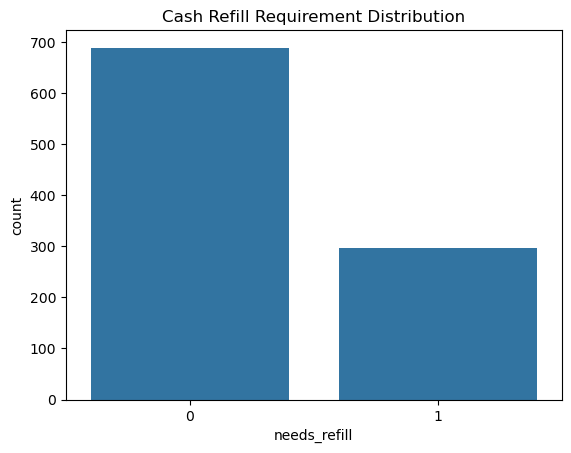

In [63]:
sns.countplot(x='needs_refill', data=df)
plt.title("Cash Refill Requirement Distribution")
plt.show()


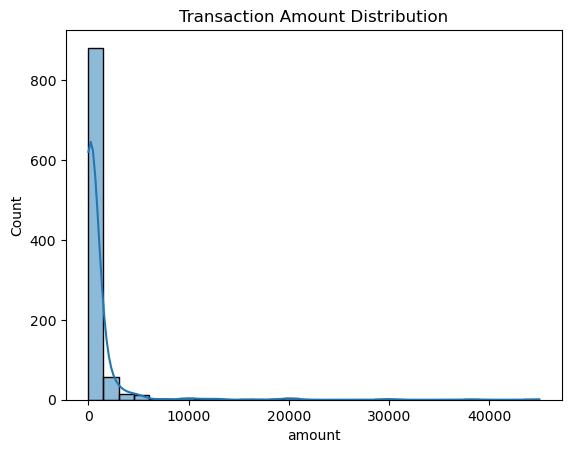

In [64]:
sns.histplot(df['amount'], bins=30, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


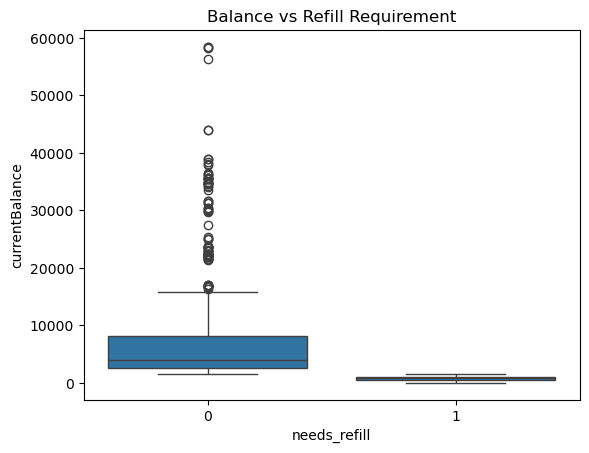

In [65]:
sns.boxplot(x='needs_refill', y='currentBalance', data=df)
plt.title("Balance vs Refill Requirement")
plt.show()


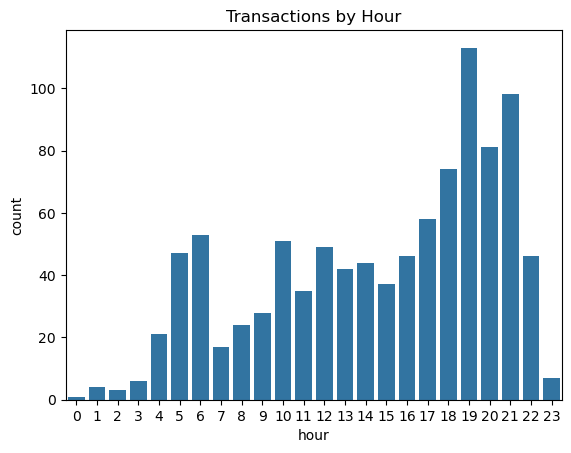

In [66]:
sns.countplot(x='hour', data=df)
plt.title("Transactions by Hour")
plt.show()


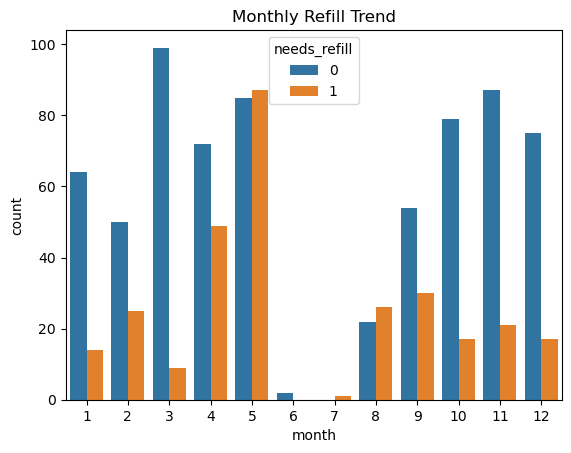

In [67]:
sns.countplot(x='month', hue='needs_refill', data=df)
plt.title("Monthly Refill Trend")
plt.show()


In [68]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['mode'] = le.fit_transform(df['mode'])


In [69]:
X = df[['type', 'mode', 'amount', 'hour', 'day', 'month']]
y = df['needs_refill']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [72]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.706081081081081


In [73]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Accuracy: 0.5844594594594594


In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.777027027027027


In [75]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8614864864864865


In [76]:
svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.706081081081081


In [77]:
results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Naive Bayes',
        'KNN',
        'Random Forest',
        'SVM'
    ],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svm_pred)
    ]
})

print(results)


                 Model  Accuracy
0  Logistic Regression  0.706081
1          Naive Bayes  0.584459
2                  KNN  0.777027
3        Random Forest  0.861486
4                  SVM  0.706081


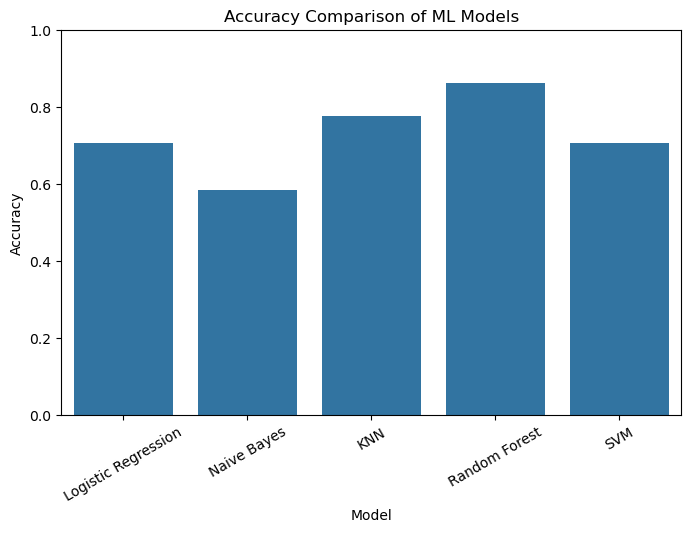

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0, 1)
plt.title('Accuracy Comparison of ML Models')
plt.xticks(rotation=30)
plt.show()


In [81]:
best_model_name = results.loc[results['Accuracy'].idxmax(), 'Model']
best_accuracy = results['Accuracy'].max()

print("Best Model:", best_model_name)
print("Best Accuracy:", best_accuracy)


Best Model: Random Forest
Best Accuracy: 0.8614864864864865


In [82]:
df['ATM_Refill_Prediction'] = rf.predict(scaler.transform(X))


In [84]:
print(df.columns)


Index(['type', 'mode', 'amount', 'currentBalance', 'transactionTimestamp',
       'valueDate', 'narration', 'hour', 'day', 'month', 'needs_refill',
       'ATM_Refill_Prediction'],
      dtype='object')


In [85]:
df[['currentBalance', 'ATM_Refill_Prediction']].head()


,currentBalance,ATM_Refill_Prediction
0,2180.8,0
1,2010.8,0
2,1510.8,0
3,1525.8,0
4,525.8,1


In [86]:
df.rename(columns={'currentBalance': 'balance'}, inplace=True)


In [87]:
df[['balance', 'ATM_Refill_Prediction']].head()
                                                      #0-no refill needed
                                                      #1 -refill needed

,balance,ATM_Refill_Prediction
0,2180.8,0
1,2010.8,0
2,1510.8,0
3,1525.8,0
4,525.8,1
